## Project Title:

### Credit card Fraud Detection with Support Vector Machines (SVM)

### Introduction

This project explores the processes of leveraging a Machine Learning model to identify fraudulent credit card transactions The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
A transaction belongs to the positive class(1) if it is a fraud, otherwise it belongs to the negative class(0).

Each row in the dataset represents a credit card transaction. The dataset has 31 variables. One variable (the last variable in the table ) is called Class and represents the target variable. The objective of this project is to train a model that uses the other variables to predict the value of the Class variable. 

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


In [4]:
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 2.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.5 MB 6.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 9.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 10.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.9/11.5 MB 12.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.5 MB 14.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.3/11.5 MB 16.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.2/11.5 MB 19.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.5 MB 21.4 MB/s eta 0:00:01
   -------------------------------------- - 11.0/11.5 MB 29.8 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.5 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.5 MB 31.2 MB/s eta 0:

In [149]:

from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC



#### Load dataset

In [117]:

# read the input data
raw_data=pd.read_csv(r'C:\Users\norteye\Desktop\creditcard.csv')
raw_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220930,142358.0,0.090989,0.747882,-0.267623,-1.017051,1.102548,-0.023918,0.865288,0.043360,-0.166683,...,-0.300494,-0.735095,-0.102387,-1.401145,-0.345586,0.206567,0.238742,0.072982,5.38,0
228822,145678.0,2.247098,-0.500405,-2.038734,-1.126956,0.184034,-0.984051,0.029479,-0.344302,-1.209819,...,0.342973,0.957399,0.024636,0.758059,0.335643,-0.038181,-0.076279,-0.082999,1.00,0
172832,121256.0,-1.001690,0.744574,0.220463,-0.759351,0.786566,-0.376804,1.033172,-0.266781,0.875070,...,-0.052898,0.538293,-0.129208,0.629333,-0.052212,0.536567,0.296284,0.171262,27.00,0
113561,73111.0,1.297299,0.259029,0.311002,0.500750,-0.213358,-0.701997,0.068033,-0.188495,0.039289,...,-0.287702,-0.814041,0.072524,-0.112742,0.293204,0.124701,-0.027812,0.014377,0.89,0
172123,120972.0,1.796030,-1.162625,-1.212959,0.749653,-0.654939,-0.119875,-0.383074,0.018294,-0.259100,...,-0.157788,-0.126837,-0.053335,-0.472417,0.092573,-0.462415,0.006769,-0.038858,150.00,0
135577,81314.0,-0.536902,0.424508,1.371805,0.643716,0.532951,-1.248087,0.197338,-0.068810,-0.537818,...,-0.160989,-0.649755,0.107507,0.344019,-0.307499,0.150874,0.005966,0.059674,0.89,0
181205,124873.0,1.993000,0.105581,-1.478922,0.656160,0.049561,-1.133651,0.093379,-0.131271,0.371934,...,-0.304203,-0.822471,0.324402,-0.069119,-0.339543,-0.004205,-0.053316,-0.041599,2.50,0
81937,59167.0,1.240886,0.064027,0.379578,0.232676,-0.297039,-0.364213,-0.071700,-0.052981,0.059514,...,-0.208276,-0.474105,-0.000005,0.053175,0.369455,0.446133,-0.041700,-0.001309,4.00,0
259251,159029.0,2.089102,0.157010,-1.830288,0.334819,0.616470,-0.613831,0.177046,-0.201839,0.484080,...,-0.377216,-0.961961,0.306143,0.178732,-0.224845,0.195459,-0.058557,-0.033826,1.29,0
7196,9435.0,-1.064659,-0.490351,2.762775,-1.534784,-0.574619,0.348493,-0.321100,0.159769,0.571891,...,0.253149,0.992321,-0.155410,-0.028747,0.411607,-0.168250,0.089590,-0.104370,90.39,0


#### Data Analysis

In [29]:
#Retrieve distinct class of the target variable
raw_data['Class'].unique()


array([0, 1], dtype=int64)

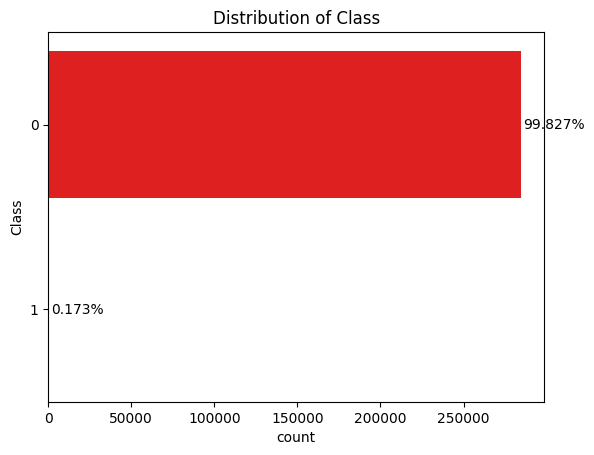

In [70]:

# Countplot for class distribution
ax = sns.countplot(y='Class', data=raw_data, color='red')
plt.title('Distribution of Class')

# Add percentages
total = len(raw_data)

for p in ax.patches:
    count = p.get_width()           # bar length since y='Class'
    percent = 100 * count / total
    ax.text(
        count + total * 0.005,       # slight offset to the right of the bar
        p.get_y() + p.get_height()/2,
        f'{percent:.3f}%',
        va='center'
    )

plt.show()


As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, we need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally,as shown by the counterplot above. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

It is also prudent to understand which features affect the model in what way. 



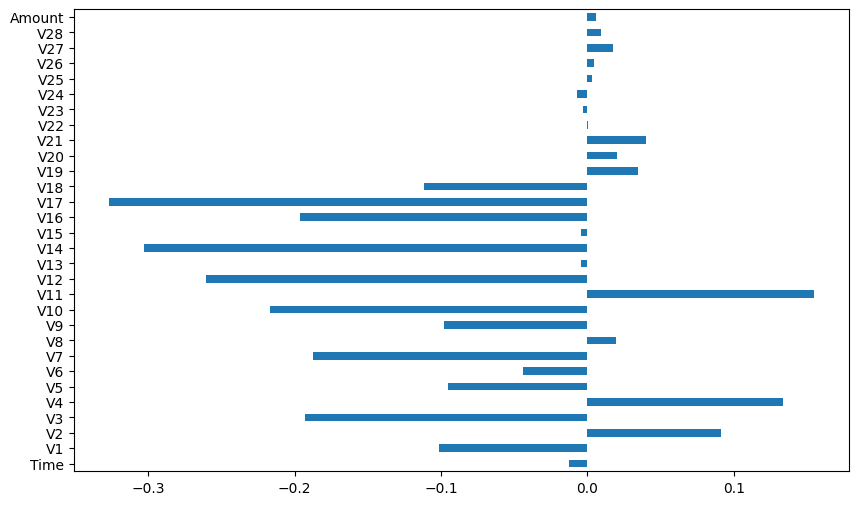

In [76]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

This clearly shows that some features affect the output Class more than the others. For efficient modeling, we may use only the most correlated features.

#### Data Preprocessing

We will now prepare the data for training. We apply standard scaling to the input features and normalize them using $$L_1$$ norm for the training model. As seen in the data snapshot, there is a parameter called Time which we will not be considering for modeling. We exclude Time because it does not help the model and can introduce bias.

Hence, features 2 to 30 will be used as input features and feature 31, i.e. Class will be used as the target variable.



In [93]:
# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

#### Dataser Train/test split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Build the Support Vector Machine model

In [113]:
svm_model = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm_model.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

#### Evaluate the SVM model

We compute the probabilities of the test samples belonging to the class of fraudulent transactions.

In [134]:
y_pred_svm = svm_model.decision_function(X_test)


In [136]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986
